### `Preparation`
Persiapan yang dilakukan meliputi *import library* yang dibutuhkan dan menyiapkan dataset

In [38]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import normaltest

In [39]:
# Import Dataset
DatasetExcel = pd.read_csv(r'E:\JCDS-Purwadhika\CapstoneModule2\data\raw\Online Retail Shipping.csv')

# Copy dari dataset yang akan digunakan
df = DatasetExcel.copy()
pd.set_option("display.max_columns", None)
# Melihat 5 baris teratas dan terbawah dari data
display(df.head(), df.tail())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


### `Data Understanding and Data Cleaning`

Langkah pertama yang dilakukan adalah data understanding dan data cleaning. Hal ini diperlukan untuk memahami isi dataset, dan mendeteksi apabila ada *error* atau *corrupt* pada data guna memaksimalkan hasil analisa. 

##### A) Data Understanding, Mengidentifikasi Adanya Duplikat, dan Memeriksa Format Data
Mengenal info kolom dan baris dari dataset, memeriksa data duplikat dan format data, serta menghapus kolom yang tidak relevan

In [40]:
# Cek data type, null value, unique value untuk setiap variable
print(f'Total rows {df.shape[0]}, Total Colum {df.shape[1]}')
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Total rows 10999, Total Colum 12


,feature,data_type,null_value,n_unique,sample_unique
0,ID,int64,0.0,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Warehouse_block,object,0.0,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,object,0.0,3,"[Flight, Ship, Road]"
3,Customer_care_calls,int64,0.0,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,int64,0.0,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,int64,0.0,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, ..."
6,Prior_purchases,int64,0.0,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,object,0.0,3,"[low, medium, high]"
8,Gender,object,0.0,2,"[F, M]"
9,Discount_offered,int64,0.0,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43,..."


| Variable | Type | Definition | Example |
| ----------- | ----------- | ----------- | ----------- |
| ID | Nominal | Customer ID Number | 10, 15, 10995, 10996
| Warehouse_block | Nominal | Warehouse to Store the Product | A, B, C, D, F
| Mode_of_Shipment | Nominal | Mode of Product Shipping | Flight, Road, Ship
| Customer_care_calls | Discrete | Number of Calls Made | 1, 2, 5, 6
| Customer_rating | Ordinal | Company Rating by Customers | 5: Best - 4: Better - 3: Neutral - 2: Bad - 1: Worst
| Cost_of_the_Product | Discrete | Cost of Product in US Dollars | 177, 216, 236, 182
| Prior_purchases | Discrete | Number of Prior Purchase | 3, 2, 6
| Product_importance | Ordinal | Product Importance Parameter | Low, Medium, High
| Gender | Nominal | Customer Gender | Male, Female
| Discount_offered | Discrete | Product Discount in US Dollars | 65, 10, 16
| Weight_in_gms | Continous | Product Weight in grams | 4953, 5676, 2171
| Reached.on.Time_Y.N | Nominal | Target Variable, 1: NOT reached on time - 0: REACHED on time | 1, 0

Mengubah nama kolom dengan mengganti nama kolom menjadi lebih sederhana

In [41]:
# Mengganti nama kolom
df.rename(columns={'ID' : 'ID', 'Warehouse_block' : 'Warehouse', 'Mode_of_Shipment' : 'Shipment', 
                   'Customer_care_calls' : 'Calls', 'Customer_rating' : 'Rating', 'Cost_of_the_Product' : 'Cost', 
                   'Prior_purchases' : 'Purchase', 'Product_importance' : 'Importance', 'Gender' : 'Gender', 
                   'Discount_offered' : 'Discount', 'Weight_in_gms' : 'Weight', 'Reached.on.Time_Y.N' : 'Late'}, inplace = True)
df.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [42]:
# Cek karakter 
sub = ['!', '@', '#', '$', '%', '&', '*', '?', ',', '=', '-', '_', '/', '|', 'unknown']
df[df.applymap(lambda x: any(substring in str(x) for substring in sub)).any(axis=1)]

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late


`ID` merupakan primary key dari data, disini akan dicek terlebih dahulu apabila data survey ada duplikat id atau tidak, untuk memastikan semua pelanggan mengisi sekali dan tidak adanya kesalahan pada saat input data

In [43]:
# Cek id duplicate
df['ID'].duplicated().sum()

0

In [44]:
df.drop(['ID'], axis = 1, inplace=True)

Karena tidak terdapat duplikat pada kolom `ID` dan dapat disimpulkan bahwa data disetiap baris pada kolom tersebut mewakili transaksi, kita dapat menghapus atau mengabaikan kolom ID karena tidak diperlukan untuk analisis data.

In [45]:
# Untuk menunjukkan statistik deskriptif masing-masing kolom
display(df.describe(), df.describe(include='object'))

,Calls,Rating,Cost,Purchase,Discount,Weight,Late
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


,Warehouse,Shipment,Importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Insight:
1. Kolom `Calls`, `Rating`, dan `Cost` tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh).
2. Kolom `Late` bernilai boolean/binary
3. Untuk kategori `Gender` **F** lebih dominan.
4. Untuk kategori `Importance` di dominasi oleh kategori **Low**.
5. Untuk kategori mode pengiriman di dominasi oleh kategri pengiriman menggunakan **Ship (Kapal)**.
6. Untuk `Warehouse` di dominasi pada block **F**.

##### B) Mendeteksi Missing Value
Selanjutnya akan di cek apabila terdapat missing value pada data:

(Warehouse     0
 Shipment      0
 Calls         0
 Rating        0
 Cost          0
 Purchase      0
 Importance    0
 Gender        0
 Discount      0
 Weight        0
 Late          0
 dtype: int64,
 <Axes: >)

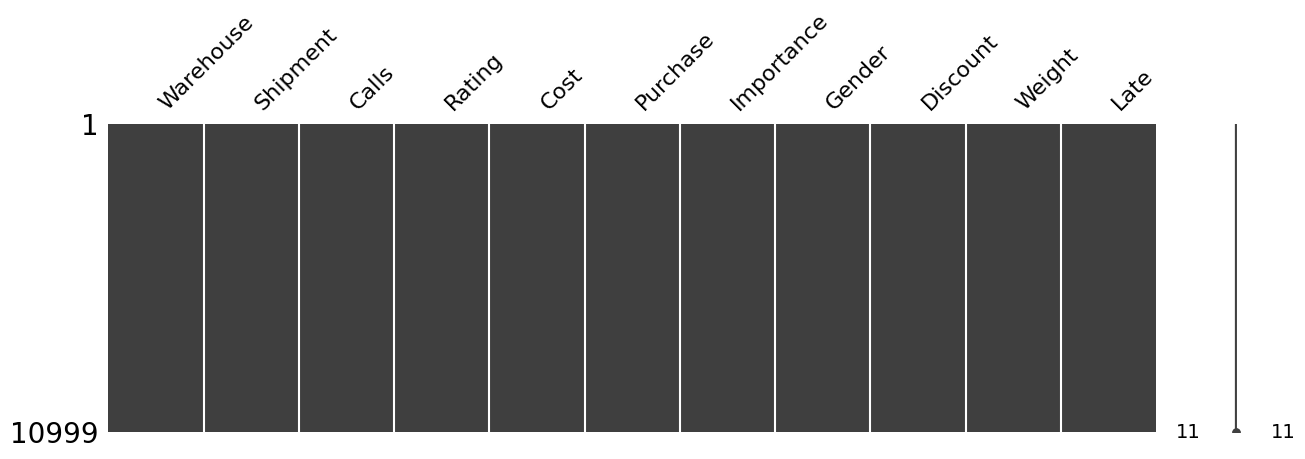

In [46]:
# Cek Missing Value seluruh kolom
df.isna().sum(), msno.matrix(df, figsize=(15, 4))

Dapat dilihat bahwa tidak terdapat missing value pada setiap variabel/data.

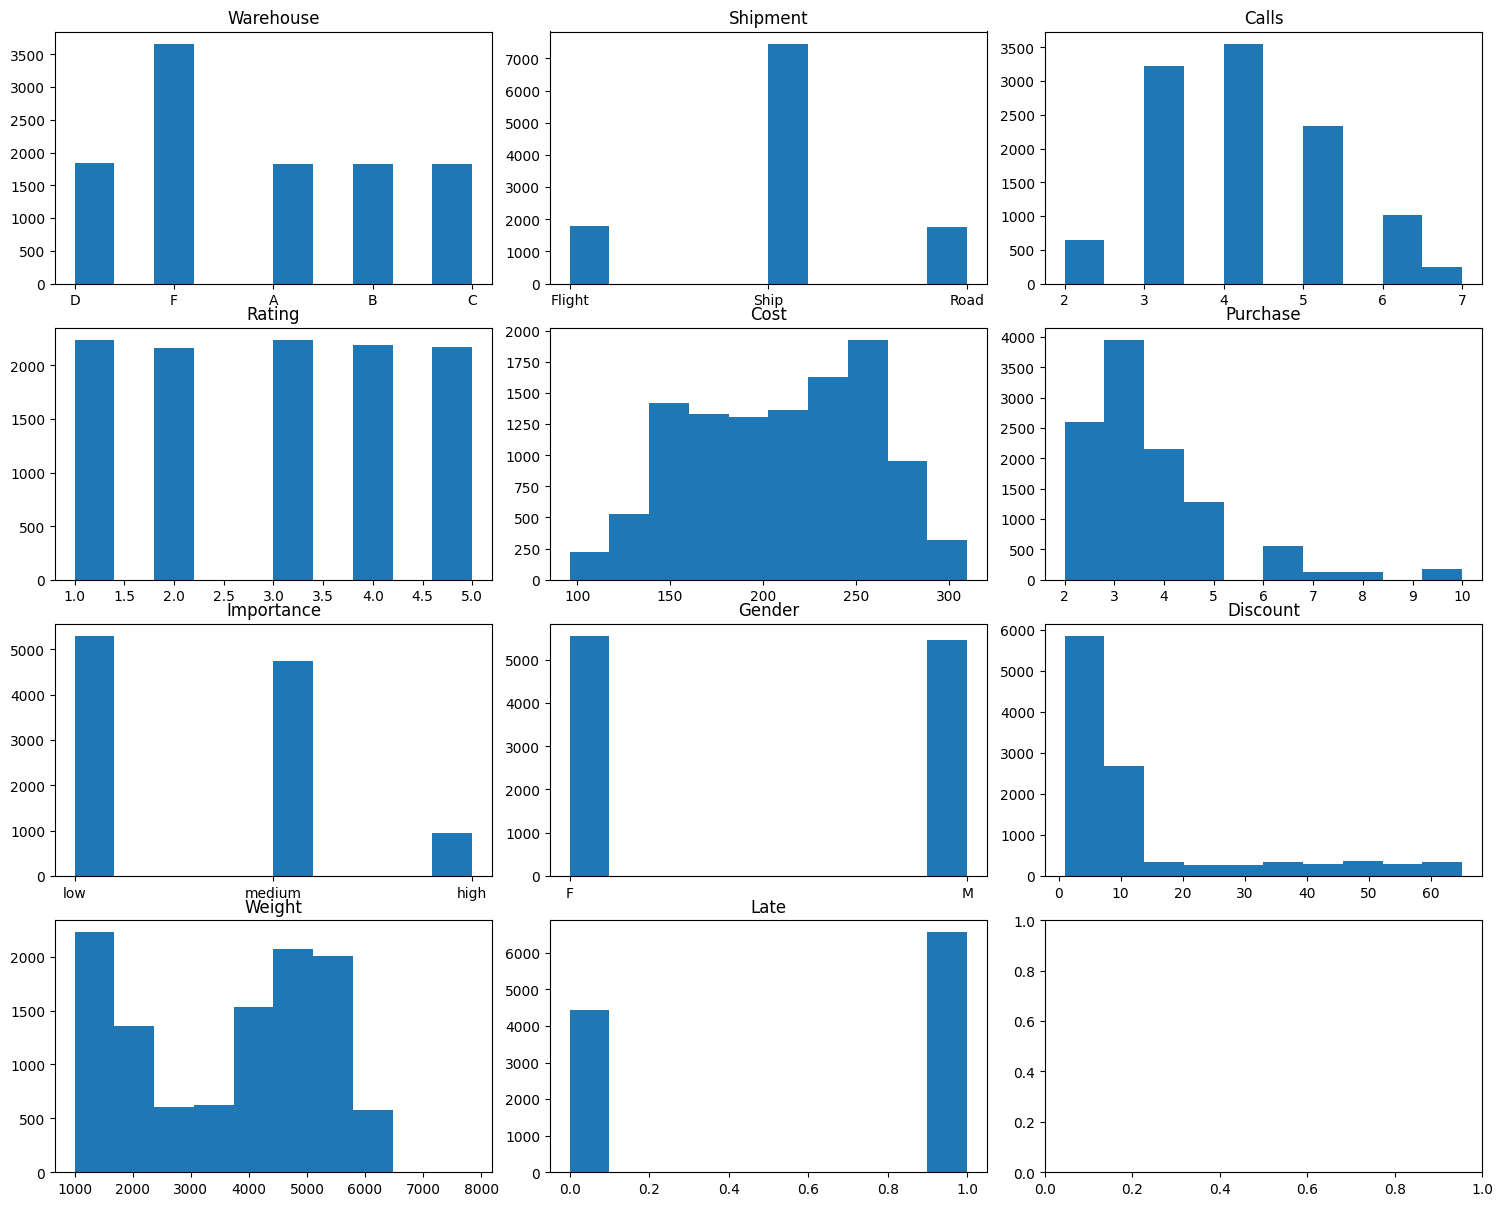

In [47]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.tight_layout()

# Menambahkan histogram dan judul
for i, column in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    ax.hist(df[column])
    ax.set_title(column)

# Menampilkan plot
plt.show()


In [48]:
columns = ['Calls', 'Rating', 'Cost', 'Purchase', 'Discount', 'Weight']

for column in columns:
    stats, pval = normaltest(df[column])
    if pval <= 0.05:
        print(f'Kolom {column} tidak berdistribusi normal')  # Ha
    else:
        print(f'Kolom {column} berdistribusi normal')  # Ho

Kolom Calls tidak berdistribusi normal
Kolom Rating tidak berdistribusi normal
Kolom Cost tidak berdistribusi normal
Kolom Purchase tidak berdistribusi normal
Kolom Discount tidak berdistribusi normal
Kolom Weight tidak berdistribusi normal


Dapat disimpulkan berdasarkan analisis secara visual dan normaltest setiap variabel atau data yang di tampilkan berdistirbusi tidak normal. Serta, kolom `Discount` dan `Purchase` tampaknya skew ke kanan (long-right tail)

##### C) Memahami outlier pada data:
Outlier merupakan titik data yang secara signifikan berbeda atau jauh dari pola atau pola umum dari data yang lain. Outlier dapat menjadi nilai yang sangat rendah atau sangat tinggi, yang terletak di luar jangkauan nilai yang diharapkan atau ekstrem dalam konteks data yang sedang diamati.

Dilakukan pengamatan outlier pada data dengan menggunakan boxplot.

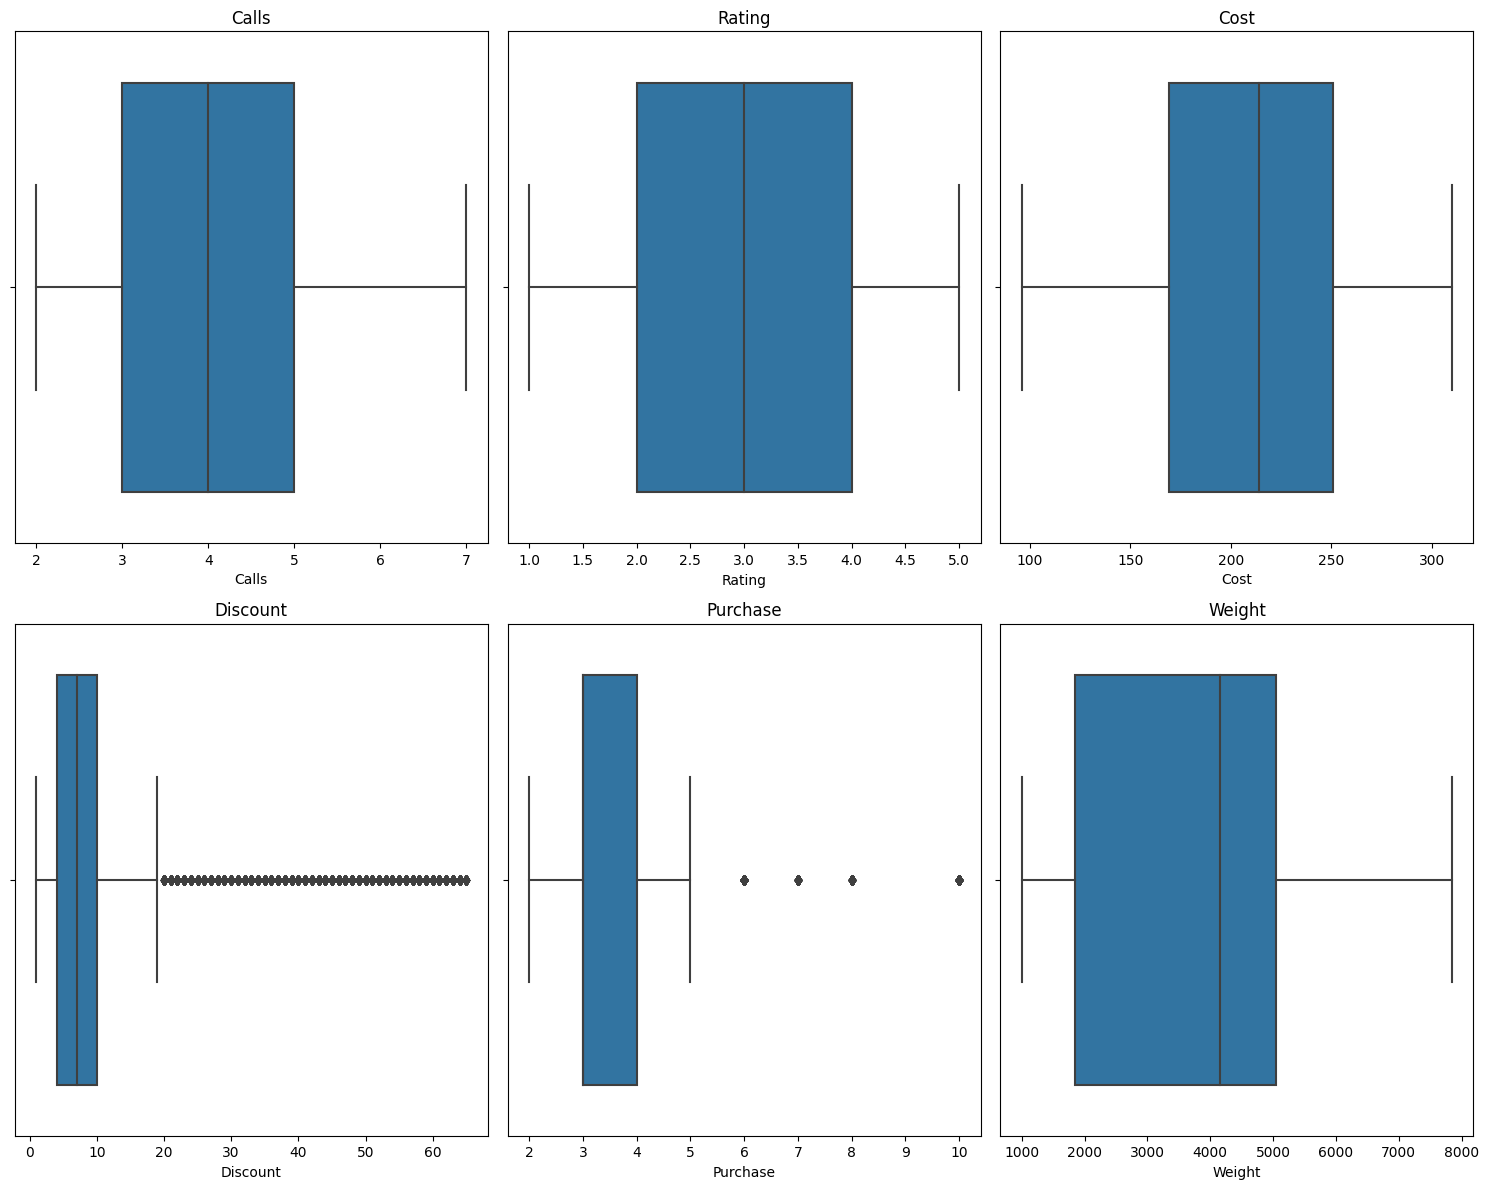

In [49]:
# Cek outlier seluruh kolom numerik

fig, axes = plt.subplots(2, 3, figsize=(15, 12))
fig.tight_layout()

# Boxplot for 'Calls'
sns.boxplot(ax=axes[0, 0], x=df['Calls'])
axes[0, 0].set_title('Calls')

# Boxplot for 'Rating'
sns.boxplot(ax=axes[0, 1], x=df['Rating'])
axes[0, 1].set_title('Rating')

# Boxplot for 'Cost'
sns.boxplot(ax=axes[0, 2], x=df['Cost'])
axes[0, 2].set_title('Cost')

# Boxplot for 'Discount'
sns.boxplot(ax=axes[1, 0], x=df['Discount'])
axes[1, 0].set_title('Discount')

# Boxplot for 'Purchase'
sns.boxplot(ax=axes[1, 1], x=df['Purchase'])
axes[1, 1].set_title('Purchase')

# Boxplot for 'Weight'
sns.boxplot(ax=axes[1, 2], x=df['Weight'])
axes[1, 2].set_title('Weight')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


Dapat dilihat grafik diatas bahwa terdapat outlier pada kolom `Discount` dan `Purchase`. Akan dilakukan analisa upper dan lower bound untuk mengetahui persentase outlier. 

In [50]:
# Mencari outliers
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

- Outlier pada `Discount_offered`	

In [51]:
outliers_Discount = find_outliers_IQR(df['Discount'])
print('number of outliers: '+ str(len(outliers_Discount)))
print('max outlier value: '+ str(outliers_Discount.max()))
print('min outlier value: '+ str(outliers_Discount.min()))

number of outliers: 2209
max outlier value: 65
min outlier value: 20


In [52]:
#cek data outliers pada Discount_offered
df[df['Discount'] > 65]


,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late


In [53]:
# find the precentage of outliers
Discount_Outliers = df[df['Discount'] > outliers_Discount[0]]
Precentage = len(Discount_Outliers)/len(df.Discount) * 100 

print(f'Precentages of outliers : {Precentage} %')

Precentages of outliers : 9.5099554504955 %


Terdapat outlier sebanyak `9.5%` pada variabel `Discount`.

- Outlier pada `Purchase`	

In [54]:
outliers_Purchase = find_outliers_IQR(df['Purchase'])
print('number of outliers: '+ str(len(outliers_Purchase)))
print('max outlier value: '+ str(outliers_Purchase.max()))
print('min outlier value: '+ str(outliers_Purchase.min()))

number of outliers: 1003
max outlier value: 10
min outlier value: 6


In [55]:
#cek data outliers pada Purchase
df[df['Purchase'] > 10]


,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late


In [56]:
# find the precentage of outliers
outliers_Purchase = df[df['Purchase'] > 6]  # Ganti some_threshold dengan nilai ambang yang sesuai
Purchase_Outliers = df[df['Purchase'].index.isin(outliers_Purchase.index)]
Percentage = len(Purchase_Outliers) / len(df['Purchase']) * 100

print(f'Percentage of outliers: {Percentage} %')

Percentage of outliers: 4.01854714064915 %


## `Creating New Attributes`

Pertama kita buat atribut lain yang akan dibutuhkan dalam analisis:
* Kategori diskon (`Category_Discount`)
* Kategori berat (`Category_Weight`)

- `Category_Discount`


Gunakan median dan MAD sebagai dasar membagi kelompoknya dikarenakan `Discount_offered` memiliki data yang bervariasi.

In [57]:
# find the median and MAD
Disc_Med = df.Discount.median()
Disc_MAD = abs(df.Discount - df.Discount.median()).median()

Lower = Disc_Med - Disc_MAD
Upper = Disc_Med + Disc_MAD

print(f'Median : {Disc_Med}, MAD : {Disc_MAD}\n Lower :{Lower}, Upper : {Upper}')

Median : 7.0, MAD : 3.0
 Lower :4.0, Upper : 10.0


In [58]:
# kategory discount by median and MAD
def Category_Discount(df):
    if 7 >= df['Discount'] > 3 :
        return "4 - 7 (Medium)"
    elif df['Discount'] < 4:
        return "0 - 3 (Low)"
    else:
        return "> 7 (High)"
    
# Membuat kolom 'Category_Discount'    
df['Category_Discount'] = df.apply(Category_Discount, axis=1)

- `Category_Weight`

In [59]:
# find the median and MAD
Weight_Med = df.Weight.median()
Weight_MAD = abs(df.Weight - df.Weight.median()).median()

Lower = Weight_Med - Weight_MAD
Upper = Weight_Med + Weight_MAD

print(f'Median : {Weight_Med}, MAD : {Weight_MAD}\n Lower :{Lower}, Upper : {Upper}')

Median : 4149.0, MAD : 1332.0
 Lower :2817.0, Upper : 5481.0


In [60]:
# kategory Weigth by median and MAD
def Category_Weight(df):
    if 4149 >= df['Weight'] > 1332 :
        return "1333 - 4149 (Medium)"
    elif df['Weight'] <= 1332:
        return "0 - 1332 (Small)"
    else:
        return "> 4149 (Large)"
    
# Membuat kolom 'Category_Weigth'    
df['Category_Weight'] = df.apply(Category_Weight, axis=1)


- `Category_Calls`

In [61]:
# find the median and MAD
Calls_Med = df.Calls.median()
Calls_MAD = abs(df.Calls - df.Calls.median()).median()

Lower = Calls_Med - Calls_MAD
Upper = Calls_Med + Calls_MAD

print(f'Median : {Calls_Med}, MAD : {Calls_MAD}\n Lower :{Lower}, Upper : {Upper}')

Median : 4.0, MAD : 1.0
 Lower :3.0, Upper : 5.0


In [62]:
# kategory Calls by median and MAD
def Category_Calls(df):
    if 4 >= df['Calls'] >= 1 :
        return "2 - 4 (Rendah)"
    else:
        return "> 4 (Tinggi)"
    
# Membuat kolom 'Category_Discount'    
df['Category_Calls'] = df.apply(Category_Calls, axis=1)

In [63]:
# find the median and MAD
Rating_Med = df.Rating.median()
Rating_MAD = abs(df.Rating - df.Rating.median()).median()

Lower = Rating_Med - Rating_MAD
Upper = Rating_Med + Rating_MAD

print(f'Median : {Rating_Med}, MAD : {Rating_MAD}\n Lower :{Lower}, Upper : {Upper}')

Median : 3.0, MAD : 1.0
 Lower :2.0, Upper : 4.0


In [64]:
# kategory Rating by median and MAD
def Satisfaction(df):
    if 3 >= df['Rating'] >= 1 :
        return "neutral or dissatisfied"
    else:
        return "satisfied"
    
# Membuat kolom 'Category_Discount'    
df['Satisfaction'] = df.apply(Satisfaction, axis=1)

In [65]:
# find the median and MAD
Purchase_Med = df.Purchase.median()
Purchase_MAD = abs(df.Purchase - df.Purchase.median()).median()

Lower = Purchase_Med - Purchase_MAD
Upper = Purchase_Med + Purchase_MAD

print(f'Median : {Purchase_Med}, MAD : {Purchase_MAD}\n Lower :{Lower}, Upper : {Upper}')

Median : 3.0, MAD : 1.0
 Lower :2.0, Upper : 4.0


In [66]:
# Kategori Pembelian sebelumnya berdasarkan median dan MAD
def Category_Purchase(df):
    if 3 >= df['Purchase'] >= 1 :
        return "Seldom"
    else:
        return "Often"

# Membuat kolom 'Category_Purchase'
df['Category_Purchase'] = df.apply(Category_Purchase, axis=1)

In [67]:
display(df.head(), df.tail())

,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late,Category_Discount,Category_Weight,Category_Calls,Satisfaction,Category_Purchase
0,D,Flight,4,2,177,3,low,F,44,1233,1,> 7 (High),0 - 1332 (Small),2 - 4 (Rendah),neutral or dissatisfied,Seldom
1,F,Flight,4,5,216,2,low,M,59,3088,1,> 7 (High),1333 - 4149 (Medium),2 - 4 (Rendah),satisfied,Seldom
2,A,Flight,2,2,183,4,low,M,48,3374,1,> 7 (High),1333 - 4149 (Medium),2 - 4 (Rendah),neutral or dissatisfied,Often
3,B,Flight,3,3,176,4,medium,M,10,1177,1,> 7 (High),0 - 1332 (Small),2 - 4 (Rendah),neutral or dissatisfied,Often
4,C,Flight,2,2,184,3,medium,F,46,2484,1,> 7 (High),1333 - 4149 (Medium),2 - 4 (Rendah),neutral or dissatisfied,Seldom


,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late,Category_Discount,Category_Weight,Category_Calls,Satisfaction,Category_Purchase
10994,A,Ship,4,1,252,5,medium,F,1,1538,1,0 - 3 (Low),1333 - 4149 (Medium),2 - 4 (Rendah),neutral or dissatisfied,Often
10995,B,Ship,4,1,232,5,medium,F,6,1247,0,4 - 7 (Medium),0 - 1332 (Small),2 - 4 (Rendah),neutral or dissatisfied,Often
10996,C,Ship,5,4,242,5,low,F,4,1155,0,4 - 7 (Medium),0 - 1332 (Small),> 4 (Tinggi),satisfied,Often
10997,F,Ship,5,2,223,6,medium,M,2,1210,0,0 - 3 (Low),0 - 1332 (Small),> 4 (Tinggi),neutral or dissatisfied,Often
10998,D,Ship,2,5,155,5,low,F,6,1639,0,4 - 7 (Medium),1333 - 4149 (Medium),2 - 4 (Rendah),satisfied,Often


Menggabungkan kolom semua kategori

In [68]:
# Memindahkan kolom 'Category_Discount' ke sebelah kolom 'Discount'
df.insert(df.columns.get_loc('Discount') + 1, 'Category_Discount', df.pop('Category_Discount'))

# Memindahkan kolom 'Category_Weight' ke sebelah kolom 'Weight'
df.insert(df.columns.get_loc('Weight') + 1, 'Category_Weight', df.pop('Category_Weight'))

# Memindahkan kolom 'Category_Calls' ke sebelah kolom 'Calls'
df.insert(df.columns.get_loc('Calls') + 1, 'Category_Calls', df.pop('Category_Calls'))

# Memindahkan kolom 'Category_Purchase' ke sebelah kolom 'Purchase'
df.insert(df.columns.get_loc('Purchase') + 1, 'Category_Purchase', df.pop('Category_Purchase'))

# Memindahkan kolom 'Satisfactions' ke sebelah kolom 'Rating'
df.insert(df.columns.get_loc('Rating') + 1, 'Satisfactions', df.pop('Satisfaction'))

# Menampilkan DataFrame
display(df.head(), df.tail())


,Warehouse,Shipment,Calls,Category_Calls,Rating,Satisfactions,Cost,Purchase,Category_Purchase,Importance,Gender,Discount,Category_Discount,Weight,Category_Weight,Late
0,D,Flight,4,2 - 4 (Rendah),2,neutral or dissatisfied,177,3,Seldom,low,F,44,> 7 (High),1233,0 - 1332 (Small),1
1,F,Flight,4,2 - 4 (Rendah),5,satisfied,216,2,Seldom,low,M,59,> 7 (High),3088,1333 - 4149 (Medium),1
2,A,Flight,2,2 - 4 (Rendah),2,neutral or dissatisfied,183,4,Often,low,M,48,> 7 (High),3374,1333 - 4149 (Medium),1
3,B,Flight,3,2 - 4 (Rendah),3,neutral or dissatisfied,176,4,Often,medium,M,10,> 7 (High),1177,0 - 1332 (Small),1
4,C,Flight,2,2 - 4 (Rendah),2,neutral or dissatisfied,184,3,Seldom,medium,F,46,> 7 (High),2484,1333 - 4149 (Medium),1


,Warehouse,Shipment,Calls,Category_Calls,Rating,Satisfactions,Cost,Purchase,Category_Purchase,Importance,Gender,Discount,Category_Discount,Weight,Category_Weight,Late
10994,A,Ship,4,2 - 4 (Rendah),1,neutral or dissatisfied,252,5,Often,medium,F,1,0 - 3 (Low),1538,1333 - 4149 (Medium),1
10995,B,Ship,4,2 - 4 (Rendah),1,neutral or dissatisfied,232,5,Often,medium,F,6,4 - 7 (Medium),1247,0 - 1332 (Small),0
10996,C,Ship,5,> 4 (Tinggi),4,satisfied,242,5,Often,low,F,4,4 - 7 (Medium),1155,0 - 1332 (Small),0
10997,F,Ship,5,> 4 (Tinggi),2,neutral or dissatisfied,223,6,Often,medium,M,2,0 - 3 (Low),1210,0 - 1332 (Small),0
10998,D,Ship,2,2 - 4 (Rendah),5,satisfied,155,5,Often,low,F,6,4 - 7 (Medium),1639,1333 - 4149 (Medium),0


## `Saving Data`

In [69]:
# saving data
df.to_csv(f'../data/processed/cleaned_data.csv', index=False)

In [70]:
# saving data
df.to_excel(f'../data/processed/cleaned_data.xlsx', index=False)